In [49]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing as prep

In [50]:
train_df = pd.read_csv('train_loan.csv' , delimiter = ',' , header = 0)
test_df = pd.read_csv('test_loan.csv' , delimiter = ',' , header = 0)

In [51]:
print("Shape of training dataset:" , train_df.shape)
print("Shape of testing dataset:" , test_df.shape)

Shape of training dataset: (614, 13)
Shape of testing dataset: (367, 12)


In [52]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [53]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [54]:
print(train_df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [55]:
Data_dict = pd.DataFrame(train_df.dtypes)
Data_dict['MissingVal'] = train_df.isnull().sum()
Data_dict['UniqueVal'] = train_df.nunique()
Data_dict['Count'] = train_df.count()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
Loan_ID,object,0,614,614
Gender,object,13,2,601
Married,object,3,2,611
Dependents,object,15,4,599
Education,object,0,2,614
Self_Employed,object,32,2,582
ApplicantIncome,int64,0,505,614
CoapplicantIncome,float64,0,287,614
LoanAmount,float64,22,203,592
Loan_Amount_Term,float64,14,10,600


In [56]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [57]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [58]:
test_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [59]:
def get_combined_data():
    train = pd.read_csv('train_loan.csv')
    test = pd.read_csv('test_loan.csv')
    targets = train.Loan_Status
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index', 'Loan_ID'], inplace=True, axis=1)
    return combined

In [60]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [61]:
def filling_missing_value():
    global combined
    combined.Gender.fillna(method = 'ffill' , inplace = True)
    combined.Married.fillna(method = 'ffill' , inplace = True)
    combined.Dependents.fillna(method = 'ffill' , inplace = True)
    combined.Self_Employed.fillna(method = 'ffill' , inplace = True)
    combined.LoanAmount.fillna(value = 142.511530 , inplace = True)
    combined.Loan_Amount_Term.fillna(value = 342.201873 , inplace = True)
    combined.Credit_History.fillna(method = 'ffill' , inplace = True)

In [62]:
filling_missing_value()

In [63]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\saheel ahmed\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'densit

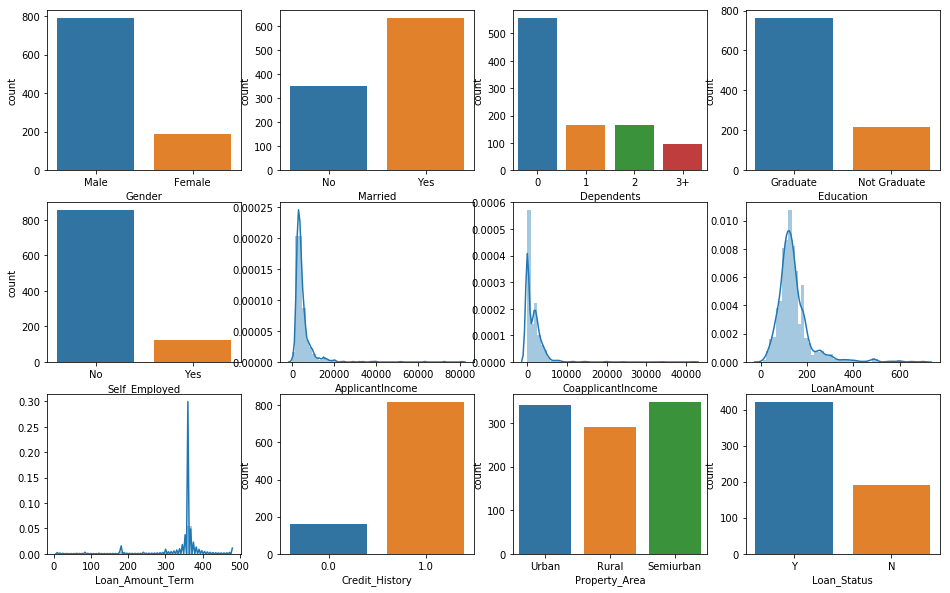

In [64]:
fig , axes = plt.subplots(3, 4, figsize = (16,10) )
sns.countplot('Gender' , data = combined, ax = axes[0,0])
sns.countplot('Married' , data = combined, ax = axes[0,1])
sns.countplot('Dependents' , data = combined, ax = axes[0,2])
sns.countplot('Education' , data = combined, ax = axes[0,3])
sns.countplot('Self_Employed' , data = combined, ax = axes[1,0])
sns.distplot(combined['ApplicantIncome'] ,kde = True, ax = axes[1,1])
sns.distplot(combined['CoapplicantIncome'] , kde = True , ax = axes[1,2])
sns.distplot(combined['LoanAmount'] , kde = True , ax = axes[1,3])
sns.distplot(combined['Loan_Amount_Term'] , kde = True , ax = axes[2,0])
sns.countplot('Credit_History' , data = combined, ax = axes[2,1])
sns.countplot('Property_Area' , data = combined, ax = axes[2,2])
sns.countplot('Loan_Status' , data = train_df, ax = axes[2,3])


In [65]:
def preprocessing_dataset():
    global combined
    
    combined['Gender'] = combined['Gender'].map({'Male':1 , 'Female':0})
    
    combined['Married'] = combined['Married'].map({'Yes':1 , 'No':0})
    
    combined['Singleton'] = combined['Dependents'].map(lambda x:1 if x=='1' else 0)
    combined['Small_family'] = combined['Dependents'].map(lambda x:1 if x=='2' else 0)
    combined['Large_family'] = combined['Dependents'].map(lambda x:1 if x=='3+' else 0)
    combined.drop('Dependents' , axis = 1 , inplace = True)
    
    combined['Education'] = combined['Education'].map({'Graduate':1 , 'Not Graduate':0})
    
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1 , 'No':0})
    
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome' , 'CoapplicantIncome'] , axis = 1 , inplace = True)
    
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']
    

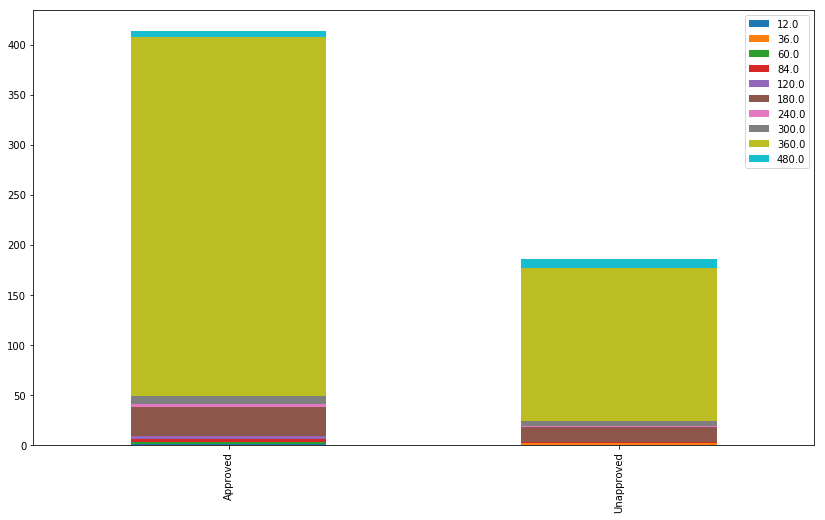

In [66]:
loan_approved = train_df['Loan_Amount_Term'][train_df['Loan_Status'] == "Y"].value_counts()
loan_unapproved = train_df['Loan_Amount_Term'][train_df['Loan_Status'] == "N"].value_counts()
new_df = pd.DataFrame([loan_approved , loan_unapproved])
new_df.index = ['Approved' , 'Unapproved']
new_df.plot(kind = 'bar' , stacked = True, figsize = (14,8))

In [67]:
def processing_loan_term():
    global combined
    combined["Very_Short_Term"] = combined['Loan_Amount_Term'].map(lambda x : 1 if x<=60 else 0)
    combined["Short_Term"] = combined['Loan_Amount_Term'].map(lambda x : 1 if x>60 and x<180 else 0)
    combined["Long_Term"] = combined['Loan_Amount_Term'].map(lambda x : 1 if x>=180 and x<=360 else 0)
    combined["Very_Long_Term"] = combined['Loan_Amount_Term'].map(lambda x : 1 if x>360 else 0)
    combined.drop('Loan_Amount_Term' , axis = 1 , inplace = True)

In [68]:
def processing_credit_history():
    global combined
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda x: 1 if x==0 else 0)
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda x: 1 if x==1 else 0)
    combined.drop('Credit_History' , axis = 1 , inplace =True)

In [69]:
def processing_property_area():
    global combined
    combined['Rural_Property_Area'] = combined['Property_Area'].map(lambda x:1 if x=='Rural' else 0)
    combined['SemiUrban_Property_Area'] = combined['Property_Area'].map(lambda x:1 if x=='Semiurban' else 0)
    combined['Urban_Property_Area'] = combined['Property_Area'].map(lambda x:1 if x=='Urban' else 0)
    combined.drop('Property_Area' , axis = 1 , inplace = True)

In [70]:
processing_loan_term()

In [71]:
processing_credit_history()

In [72]:
processing_property_area()

In [73]:
preprocessing_dataset()

In [75]:
combined.head(10)

,Gender,Married,Education,Self_Employed,LoanAmount,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Good,Credit_History_Bad,Rural_Property_Area,SemiUrban_Property_Area,Urban_Property_Area,Singleton,Small_family,Large_family,Total_Income,Debt_Income_Ratio
0,1,0,1,0,142.51153,0,0,1,0,0,1,0,0,1,0,0,0,5849.0,41.042293
1,1,1,1,0,128.00000,0,0,1,0,0,1,1,0,0,1,0,0,6091.0,47.585938
2,1,1,1,1,66.00000,0,0,1,0,0,1,0,0,1,0,0,0,3000.0,45.454545
3,1,1,0,0,120.00000,0,0,1,0,0,1,0,0,1,0,0,0,4941.0,41.175000
4,1,0,1,0,141.00000,0,0,1,0,0,1,0,0,1,0,0,0,6000.0,42.553191
5,1,1,1,1,267.00000,0,0,1,0,0,1,0,0,1,0,1,0,9613.0,36.003745
6,1,1,0,0,95.00000,0,0,1,0,0,1,0,0,1,0,0,0,3849.0,40.515789
7,1,1,1,0,158.00000,0,0,1,0,1,0,0,1,0,0,0,1,5540.0,35.063291
8,1,1,1,0,168.00000,0,0,1,0,0,1,0,0,1,0,1,0,5532.0,32.928571
9,1,1,1,0,349.00000,0,0,1,0,0,1,0,1,0,1,0,0,23809.0,68.220630


In [76]:
def feature_scaling(df):
        df-=df.min()
        df/=df.max()
        return df

In [78]:
combined['LoanAmount'] = feature_scaling(combined['LoanAmount'])
combined['Total_Income'] = feature_scaling(combined['Total_Income'])
combined['Debt_Income_Ratio'] = feature_scaling(combined['Debt_Income_Ratio'])

In [79]:
combined.head(10)

,Gender,Married,Education,Self_Employed,LoanAmount,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term,Credit_History_Good,Credit_History_Bad,Rural_Property_Area,SemiUrban_Property_Area,Urban_Property_Area,Singleton,Small_family,Large_family,Total_Income,Debt_Income_Ratio
0,1,0,1,0,0.193215,0,0,1,0,0,1,0,0,1,0,0,0,0.055394,0.060682
1,1,1,1,0,0.172214,0,0,1,0,0,1,1,0,0,1,0,0,0.058435,0.073382
2,1,1,1,1,0.082489,0,0,1,0,0,1,0,0,1,0,0,0,0.019583,0.069245
3,1,1,0,0,0.160637,0,0,1,0,0,1,0,0,1,0,0,0,0.043980,0.060939
4,1,0,1,0,0.191027,0,0,1,0,0,1,0,0,1,0,0,0,0.057292,0.063614
5,1,1,1,1,0.373372,0,0,1,0,0,1,0,0,1,0,1,0,0.102705,0.050902
6,1,1,0,0,0.124457,0,0,1,0,0,1,0,0,1,0,0,0,0.030255,0.059660
7,1,1,1,0,0.215630,0,0,1,0,1,0,0,1,0,0,0,1,0.051510,0.049077
8,1,1,1,0,0.230101,0,0,1,0,0,1,0,0,1,0,1,0,0.051409,0.044934
9,1,1,1,0,0.492041,0,0,1,0,0,1,0,1,0,1,0,0,0.281141,0.113432
